In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline


# sns.set_style('darkgrid')
# matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['figure.figsize'] = (10, 6)
# matplotlib.rcParams['figure.facecolor'] = '#000000'

In [8]:
raw_df = pd.read_csv('dataset/weatherAUS.csv')

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
data = raw_df
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

#### Exploratory analysis & visualization

In [10]:
print(data.columns)

data.head()

# data.info()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [11]:
unique_locations = data.Location.nunique()
print(f'Unique locations: {unique_locations}')
fig = px.histogram(
    data,
    x='Location',
    title='Location vs Rainy days',
    color='RainToday'
)
fig.update_layout(bargap=0.3)

Unique locations: 49


Temp3pm

In [12]:
px.histogram(
    data,
    x='Temp3pm',
    color='RainTomorrow',
    title='Temperature at 3pm vs Rain tomorrow'
)

In [13]:
px.histogram(
    data,
    x='RainTomorrow',
    color='RainToday',
    title='Rain Tomorrow vs Rain today'
)

In [14]:
px.scatter(
    data.sample(2000),
    x='MinTemp',
    y='MaxTemp',
    opacity=0.7,
    color='RainToday',
    title='Min Temp. vs Max Temp'
)

In [15]:
px.strip(
    data.sample(2000),
    x='Temp3pm',
    y='Humidity3pm',
    color='RainTomorrow'
)

Get a portion of the dataset

In [16]:
use_sample = False
sample_fraction = 0.1
if use_sample:
    data = data.sample(frac=sample_fraction).copy()

#### Training, Validation & Test set

In [17]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(84471, 23)
(28158, 23)
(28158, 23)


For the timeseries data its better to splits as the last faction as the test set and before that faction make it as validation set and before that everything a training set

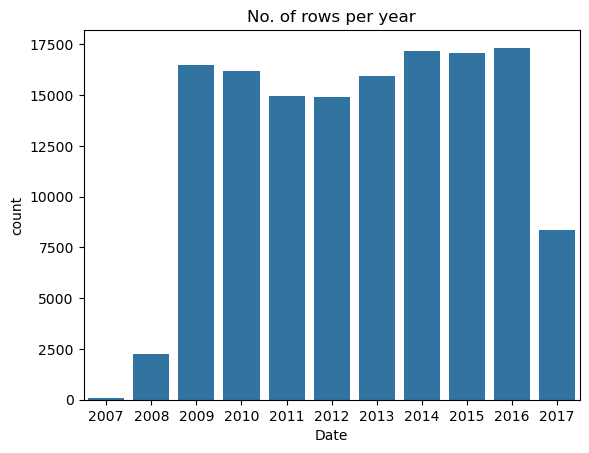

In [18]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)
plt.show()

In [19]:
year = pd.to_datetime(data.Date).dt.year

train_df = data[year < 2015]
val_df = data[year == 2015]
test_df = data[year > 2015]

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(97988, 23)
(17089, 23)
(25710, 23)


#### Identifying the inputs and the targets

In [20]:
input_cols = list(train_df.columns)[1: -1]
target_cols = 'RainTomorrow'

# create inputs and targets for the training, validation & the test
# sets for the processing and modeling

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()



Differentiate numeric columns and categorical cols

In [21]:
# train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

get unique categorical data

In [22]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

##### Imputing missing numeric data
fill missing values: replace the missing value with the mean/average value in the column values

In [23]:
from sklearn.impute import SimpleImputer

# 'mean', 'median'm 'most_frequent'
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

# check missing value in each numeric columns
total_missing_val = data[numeric_cols].isna().sum()

train_missing_val = train_df[numeric_cols].isna().sum()
validation_missing_val = train_df[numeric_cols].isna().sum()
test_missing_val = train_df[numeric_cols].isna().sum()

# fit the imputer to the data
imputer.fit(data[numeric_cols])
# list(imputer.statistics_)
# fill missing values with the imputer value
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

# check
check_imputer = train_inputs[numeric_cols].isna().sum()
print(f'Check missing values: {check_imputer}')

Check missing values: MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


#### Scaling Numeric feature
MinMaxScaler from sklearn.preprocessing to scale the values to (0, 1)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[numeric_cols])

# print('minimum: ')
# print(list(scaler.data_min_))

# print('maximum: ')
# print(list(scaler.data_max_))

# print('ranges: ')
# print(list(scaler.data_range_))
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


##### Encoding categorical data

In [25]:
from sklearn.preprocessing import OneHotEncoder

# data['Location'].unique()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

data2 = data[categorical_cols].fillna('Unknown')
encoder.fit(data2)

# # encoder.categories_
# # get column names for each individual category using get_feature_names
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))


/tmp/ipykernel_24516/916231061.py:13: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_24516/916231061.py:13: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_24516/916231061.py:13: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_24516/916231061.py:13: Performance

##### Saving processed data to disk

In [26]:
print('train_inputs', train_inputs.shape)
print('val_inputs', val_inputs.shape)
print('test_inputs', test_inputs.shape)

print('train_targets', train_targets.shape)
print('val_targets', val_targets.shape)
print('test_targets', test_targets.shape)

train_inputs.to_parquet('lr_01_train_inputs.parquet')
val_inputs.to_parquet('lr_01_val_inputs.parquet')
test_inputs.to_parquet('lr_01_test_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('lr_01_train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('lr_01_val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('lr_01_test_targets.parquet')

/home/sudiptoshahin/anaconda3/envs/myenv/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



train_inputs (97988, 123)
val_inputs (17089, 123)
test_inputs (25710, 123)
train_targets (97988,)
val_targets (17089,)
test_targets (25710,)


##### read the saved data by using pd.read_parquet()

In [27]:
train_inputs = pd.read_parquet('lr_01_train_inputs.parquet')
val_inputs = pd.read_parquet('lr_01_val_inputs.parquet')
test_inputs = pd.read_parquet('lr_01_test_inputs.parquet')

train_targets = pd.read_parquet('lr_01_train_targets.parquet')
val_targets = pd.read_parquet('lr_01_val_targets.parquet')
test_targets = pd.read_parquet('lr_01_test_targets.parquet')


#### LogisticRegression model

model.fit()
* initialize with random parameters(weights & biases)
* pass some inputs into the model to obtain predictions
* compare the models predictions with actual targets using the loss func
* use optimized techniue to reduce the loss by adjusting the weights & biases of the model
* repeat 1 to 4 till the prediction from the model is good enough

In [28]:
from sklearn.linear_model import LogisticRegression

# liblinear-> binary
model = LogisticRegression(solver='liblinear')

model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

/home/sudiptoshahin/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(solver='liblinear')

weight and biases for the trained model

In [29]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [30]:
print(model.coef_.tolist())
print(model.intercept_.tolist())

[[0.8986212683795809, -2.879896696745946, 3.162776368441344, 0.8542660314534993, -1.671392783977927, 6.764396408670535, -0.9423278023294654, -1.4284238997554828, 0.3228972174740011, 5.995318198445242, 5.463873966688673, -9.176813512087545, -0.16229529011656857, 1.2876567185059078, 0.47472458486074814, 2.021417003893675, 0.6016503531570035, -0.5524810395501812, 0.4781412539364615, 0.007675532963623369, 0.3468144891531822, -0.3522773217367305, 0.1797091094319952, 0.44048537163777696, -0.013982655835777192, 0.028940902751769932, 0.258143509997147, -0.021206947504242443, -0.042792255559674586, -0.48314021669938534, -0.13756577673373463, -0.5760591606623541, -0.7875149649608326, -0.25540403973098524, -0.32888191789339705, -0.569002685020712, 0.08182861442536514, 0.013385353430680244, 0.06412724817908856, -0.9020545935046752, -0.44433113522707274, 0.008505212174771003, -0.46061152929104576, -0.4655173221285821, -0.06949603581181066, 0.19115561033297174, 0.4504755024700953, 0.6081221099564744

In [31]:
weight_df = pd.DataFrame({
    'feature': (numeric_cols + encoded_cols),
    'weight': model.coef_.tolist()[0]
})

# plt.figure(figsize=(10, 50))
# sns.barplot(data=weight_df, x='weight', y='feature')
fig = px.bar(weight_df, x='weight', y='feature')
fig.show()

sort and pickup the top 10 values with of higher weights

<Axes: xlabel='weight', ylabel='feature'>

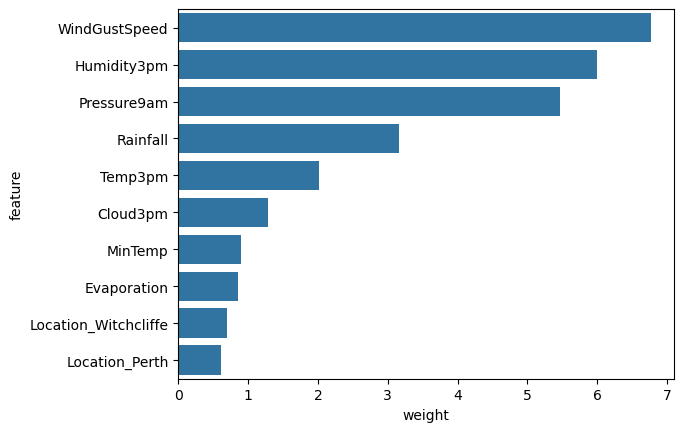

In [32]:
sorted_weight_df = weight_df.sort_values('weight', ascending=False).head(10)
sns.barplot(data=sorted_weight_df, x='weight', y='feature')

##### Make predictions & Evaluating the model

In [33]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

train_preds = model.predict(X_train)

test_preds = model.predict(X_test)

probabilistic prediction with predict_proba

In [34]:
train_probs = model.predict_proba(X_train)

model accuracy

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score(train_targets, train_preds)

confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [36]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion matrix'.format(name))

    return preds


training set

Accuracy: 85.19%


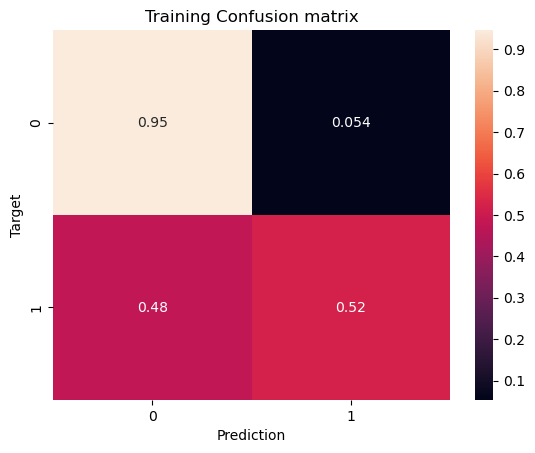

In [37]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

validation set

Accuracy: 85.40%


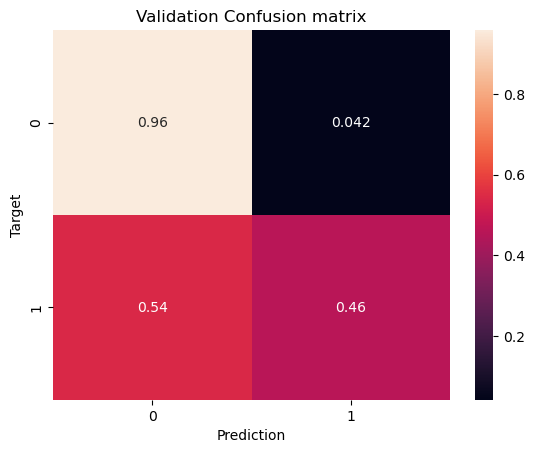

In [38]:
val_pred = predict_and_plot(X_val, val_targets, name='Validation')

Test sets

Accuracy: 84.20%


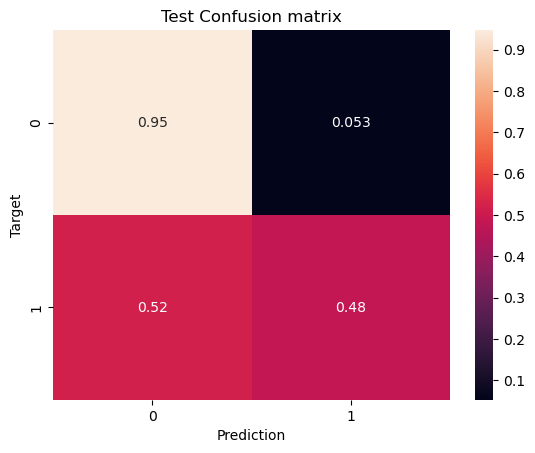

In [39]:
test_preds = predict_and_plot(X_test, test_targets, name='Test')


Verify a model has actually learned something useful is to compare its result to a 'random' or dumb model.

now create 2 models:
* guesses randomly
* another one always returns 'no'

they completely igmore the inputs given to them.

In [40]:
# guess randomly
def random_guess(inputs):
    return np.random.choice(['no', 'yes'], len(inputs))

# all no
def all_no(inputs):
    return np.full(len(inputs), 'No')


check accuracy of the above model

In [41]:
print(random_guess(X_val))
print(all_no(X_val))

['no' 'yes' 'no' ... 'no' 'yes' 'yes']
['No' 'No' 'No' ... 'No' 'No' 'No']


In [42]:
random_guess_model = pd.DataFrame(random_guess(X_test))

accuracy_score(test_targets, random_guess(X_test))

accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

##### Make predictions on a single input

In [ ]:
new_input = {
    'Date': '2021-06-19',
    'Location': 'Kathrine',
    'MinTemp': 23.2,
    'MaxTemp': 33.2,
    'Rainfall': 10.2,
    'Evaporation': 4.2,
    'Sunshine': np.nan,
    'WindGustDir': 'NNW',
    'WindGustSpeed': 52.0,
    'WindDir9am': 'NW',
    'WindDir3pm': 'NNE',
    'WindSpeed9am': 13.0,
    'WindSpeed3pm': 20.0,
    'Humidity9am': 89.0,
    'Humidity3pm': 58.0,
    'Pressure9am': 1004.8,
    'Pressure3pm': 1001.5,
    'Cloud3pm': 8.0,
    'Cloud3pm': 5.0,
    'Temp9am': 25.7,
    'Temp3pm': 33.0,
    'RainToday': 'Yes'
}